## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 2s 31us/step - loss: 1.4689 - accuracy: 0.4804 - val_loss: 1.6258 - val_accuracy: 0.4331
Epoch 50/50
50000/50000 [==============================] - 2s 31us/step - loss: 1.4642 - accuracy: 0.4842 - val_loss: 1.6500 - val_accuracy: 0.4296
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (D

50000/50000 [==============================] - 1s 28us/step - loss: 0.4222 - accuracy: 0.8500 - val_loss: 2.1498 - val_accuracy: 0.5207
Epoch 48/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.4077 - accuracy: 0.8545 - val_loss: 2.1982 - val_accuracy: 0.5279
Epoch 49/50
50000/50000 [==============================] - 1s 27us/step - loss: 0.3901 - accuracy: 0.8590 - val_loss: 2.1678 - val_accuracy: 0.5210
Epoch 50/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.3842 - accuracy: 0.8615 - val_loss: 2.3110 - val_accuracy: 0.5230
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 1s 29us/step - loss: 0.9518 - accuracy: 0.6657 - val_loss: 1.3665 - val_accuracy: 0.5336
Epoch 46/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.9378 - accuracy: 0.6691 - val_loss: 1.4251 - val_accuracy: 0.5120
Epoch 47/50
50000/50000 [==============================] - 1s 27us/step - loss: 0.9230 - accuracy: 0.6738 - val_loss: 1.4362 - val_accuracy: 0.5133
Epoch 48/50
50000/50000 [==============================] - 1s 27us/step - loss: 0.9133 - accuracy: 0.6788 - val_loss: 1.4122 - val_accuracy: 0.5259
Epoch 49/50
50000/50000 [==============================] - 1s 29us/step - loss: 0.8974 - accuracy: 0.6846 - val_loss: 1.3923 - val_accuracy: 0.5248
Epoch 50/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.8868 - accuracy: 0.6874 - val_loss: 1.3957 - val_accuracy: 0.5295
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type

50000/50000 [==============================] - 1s 27us/step - loss: 1.5773 - accuracy: 0.4518 - val_loss: 1.5900 - val_accuracy: 0.4459
Epoch 44/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5735 - accuracy: 0.4530 - val_loss: 1.5874 - val_accuracy: 0.4472
Epoch 45/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5688 - accuracy: 0.4548 - val_loss: 1.5813 - val_accuracy: 0.4481
Epoch 46/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5642 - accuracy: 0.4549 - val_loss: 1.5788 - val_accuracy: 0.4503
Epoch 47/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5606 - accuracy: 0.4577 - val_loss: 1.5757 - val_accuracy: 0.4525
Epoch 48/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5562 - accuracy: 0.4596 - val_loss: 1.5711 - val_accuracy: 0.4536
Epoch 49/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5522 - accuracy: 0.4608 - val_loss: 1.5689

50000/50000 [==============================] - 1s 27us/step - loss: 1.9563 - accuracy: 0.3141 - val_loss: 1.9536 - val_accuracy: 0.3151
Epoch 42/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.9523 - accuracy: 0.3159 - val_loss: 1.9498 - val_accuracy: 0.3175
Epoch 43/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.9485 - accuracy: 0.3172 - val_loss: 1.9462 - val_accuracy: 0.3174
Epoch 44/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.9448 - accuracy: 0.3179 - val_loss: 1.9427 - val_accuracy: 0.3209
Epoch 45/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.9412 - accuracy: 0.3196 - val_loss: 1.9392 - val_accuracy: 0.3219
Epoch 46/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.9377 - accuracy: 0.3217 - val_loss: 1.9360 - val_accuracy: 0.3220
Epoch 47/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.9344 - accuracy: 0.3225 - val_loss: 1.9328

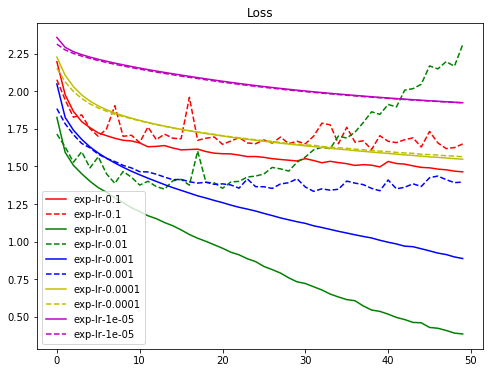

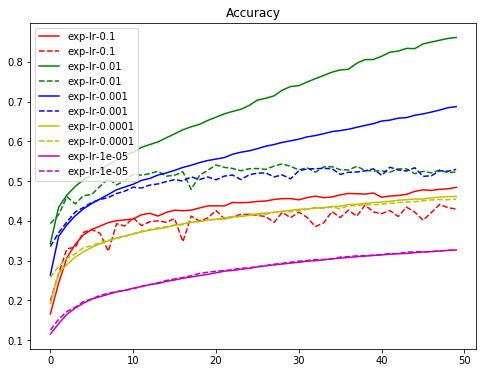

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()